## Using Diffrent Algos for Single variable linear Regression

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
df.shape

(700, 2)

In [21]:
df.dropna(how='any', inplace=True)
df.shape

(699, 2)

In [23]:
df.y.isnull().any()

False

In [24]:
X, Y = df['x'], df['y']
X.shape

(699,)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y)
print(x_train.shape)
print(x_test.shape)

(524,)
(175,)


In [26]:
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)
type(x_train)

numpy.ndarray

In [27]:
from sklearn.linear_model import LinearRegression
algo = LinearRegression()
algo.fit(x_train, y_train)
y_predict = algo.predict(y_test)

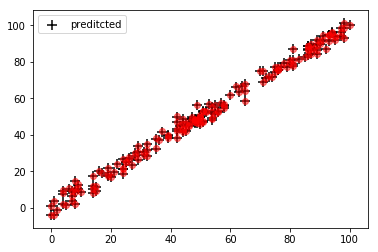

In [28]:
plt.scatter(x_test, y_predict, color = 'black', marker = '+', label = 'preditcted', s = 100)
plt.scatter(x_test, y_test, color = 'red', alpha = 0.5)
plt.legend()

In [29]:
print(algo.score(y_test, y_predict) * 100)
print(algo.intercept_)
print(algo.coef_)

100.0
[-0.17021592]
[[1.0015884]]


### Creating gradient descent algo

In [30]:
def linear_reg_fit(x_train, y_train):
    a0 = 0
    a1 = 0
    alpha = 0.00001
    epochs = 0
    while epochs <= 100:
        y_hat = (a0 * x_train) + a1 ## y = mx + c
        error = (y_hat - y_train)
        mean_sqr_err = np.sum(error ** 2)
        mean_sqr_err = mean_sqr_err / y_train.shape[0]
        if(abs(mean_sqr_err) <= 0.01):
            break;
        a1 = a1 - 0.00001 * 2 * np.sum(error)/y_train.shape[0]
        a0 = a0 - 0.00001 * 2 * np.sum(error * x_train)/y_train.shape[0]
        epochs += 1
#         if epochs % 10 == 0:
#             print(mean_sqr_err)
    return a0, a1    

In [31]:
m, c = linear_reg_fit(x_train, y_train)
print(m)
print(c)
y_predict = m * x_test + c

0.9978069839765416
0.014895827101277738


99.02228382758214


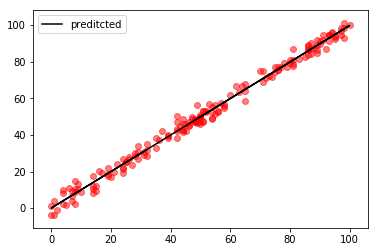

In [32]:
# plt.scatter(x_test, y_predict, color = 'black', marker = '+', label = 'preditcted', s = 100)
plt.plot(x_test, y_predict, color = 'black', label = 'preditcted',)
plt.scatter(x_test, y_test, color = 'red', alpha = 0.5)
plt.legend()
print(algo.score(y_test, y_predict) * 100)

### Doing cnml way

In [33]:
num = y_train.mean() * x_train.mean() + (np.mean(x_train * y_train))
den = np.mean(x_train * x_train) + (x_train.mean() ** 2)
m = num/den
c = ((m * np.mean(x_train * x_train) - np.mean(x_train * y_train))/ x_train.mean()) 
print(c)
print(m)
y_predict2 = m * x_test + c

-0.024799990362569607
0.9986587235446954


### Doing ap Statistics way

In [34]:
import math 
x = x_train
y = y_train
er_x = x - x.mean()
er_y = y - y.mean()
n = x.shape[0]
sx = math.sqrt(np.sum(er_x * er_x)/n)
sy = math.sqrt(np.sum(er_y * er_y)/n)
zx = er_x/sx
zy = er_y/sy
r = np.sum(zx * zy)/ (n-1)
m = r * sx/sy
c = y.mean() - (m * x.mean())
print('m1 ' + str(m))
print('c1 ' + str(c))
y_predict3 = m * x_test + c
cov_xy = np.sum(er_x * er_y)/n
## This is derivatived way
m2 = cov_xy/ (sx**2)
print('m2 ' + str(m2))
c2 = cov_xy/ (sy**2)
print('c2 ' + str(c2))
y_predict4 = m2 * x_test + c2

m1 0.991134746155526
c1 0.3486563606200903
m2 1.0015883996474846
c2 0.9892432676323282


In [36]:
%matplotlib qt
# plt.scatter(x_test, y_predict, color = 'black', marker = '+', label = 'preditcted', s = 100)
plt.plot(x_test, y_predict, color = 'black', label = 'gradient', linewidth = 2)
plt.plot(x_test, y_predict2, color = 'blue', label = 'cnml',)
plt.plot(x_test, y_predict3, color = 'green', label = 'apstats',)
plt.plot(x_test, y_predict4, color = 'yellow', label = 'derived',)
plt.scatter(x_test, y_test, color = 'red', alpha = 0.5, label = 'orignal')
plt.legend()
print(algo.score(y_test, y_predict) * 100)

99.02228382758214


![title](fig.png)


In [37]:
from sklearn.metrics import mean_squared_error
print("gradient: " + str(mean_squared_error(y_test, y_predict)))
print("cnml: " + str(mean_squared_error(y_test, y_predict2)))
print("apstats: " + str(mean_squared_error(y_test, y_predict3)))
print("derived: " + str(mean_squared_error(y_test, y_predict4)))

gradient: 8.017951470549423
cnml: 8.018111048606553
apstats: 8.054985942414993
derived: 9.222150955191047
